# Import libraries

In [1]:
import pandas as pd
import numpy as np
import nltk
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem import LancasterStemmer, PorterStemmer
import matplotlib.pyplot as plt
from customtkinter import *

In [2]:
# nltk.download('stopwords')
# nltk.download('punkt')
# nltk.download('all')

# Data reading

In [3]:
df = pd.read_csv('gplay_scrape_uber.csv')

In [4]:
df.head()

,Unnamed: 0,content,score
0,0,"Just got a free month of Uber One, I've been o...",1
1,1,Don't count on Uber if your ride is time sensi...,1
2,2,This app used to be easy and convenient but th...,1
3,3,I would rate this app 5/5 if it weren't for th...,3
4,4,Terrible update. So much more difficult to nav...,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  50000 non-null  int64 
 1   content     50000 non-null  object
 2   score       50000 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.1+ MB


In [6]:
df.duplicated().sum()

np.int64(0)

In [7]:
df.drop_duplicates(inplace=True)
df.dropna(inplace=True)

In [8]:
df = df.rename(columns={
    'content': 'text'
})

In [9]:
df.head()

,Unnamed: 0,text,score
0,0,"Just got a free month of Uber One, I've been o...",1
1,1,Don't count on Uber if your ride is time sensi...,1
2,2,This app used to be easy and convenient but th...,1
3,3,I would rate this app 5/5 if it weren't for th...,3
4,4,Terrible update. So much more difficult to nav...,1


In [10]:
# def get_sentiment(text):
#     return TextBlob(text).sentiment.polarity

# df['sentiment_polarity'] = df['text'].apply(get_sentiment)
# df.head()

In [11]:
df[df['score'] == 5]

,Unnamed: 0,text,score
147,147,"The best ride app, out there! I have left my p...",5
183,183,I was very pleased with my Uber experience. Fi...,5
201,201,I've been using uber constantly for a year now...,5
222,222,I don't quite know how they make money but I'm...,5
315,315,"The app is great, but you have far too many dr...",5
...,...,...,...
49962,49962,I do think a feature should be added where you...,5
49963,49963,"Responsive, effective and efecient Service",5
49969,49969,The app is ok. The rides are from one point to...,5
49976,49976,"We were waiting at the Brit, in Jacksonville, ...",5


In [12]:
stop_words = set(stopwords.words('english'))

stemmer = PorterStemmer()

In [13]:
def preprocess(text):
    text = text.lower()
    text = re.sub(r'@\w+','',text)
    text = re.sub(r'http\S+','',text)
    text = re.sub(r'^\w\s','',text)
    text = re.sub(r'\s+',' ',text)
    text = re.sub(r'\d+','',text)
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    text = text.replace('Ã¢â‚¬Â¦', '')
    tokens = word_tokenize(text)
    filtered = [word for word in tokens if word not in stop_words]
    stemmed = [stemmer.stem(word) for word in filtered]
    return stemmed

In [14]:
df['text'] = df['text'].apply(preprocess)

In [15]:
df.head()

,Unnamed: 0,text,score
0,0,"[got, free, month, uber, one, ive, order, usua...",1
1,1,"[dont, count, uber, ride, time, sensit, reques...",1
2,2,"[app, use, easi, conveni, last, ride, complex,...",1
3,3,"[would, rate, app, werent, uber, cancel, small...",3
4,4,"[terribl, updat, much, difficult, navig, user,...",1


In [16]:
df = df.drop(columns='Unnamed: 0')

In [17]:
from textblob import TextBlob

def get_sentiment(raw):
    text = ' '.join(raw)
    polarity = TextBlob(text).sentiment.polarity  # Ambil nilai polaritas
    if polarity > 0:
        return 'positif'
    elif polarity == 0:
        return 'netral'
    else:
        return 'negatif'
    
df['sentiment'] = df['text'].apply(get_sentiment)

In [18]:
df

,text,score,sentiment
0,"[got, free, month, uber, one, ive, order, usua...",1,negatif
1,"[dont, count, uber, ride, time, sensit, reques...",1,positif
2,"[app, use, easi, conveni, last, ride, complex,...",1,negatif
3,"[would, rate, app, werent, uber, cancel, small...",3,negatif
4,"[terribl, updat, much, difficult, navig, user,...",1,negatif
...,...,...,...
49995,"[driver, start, ride, without, otp, mani, driv...",1,netral
49996,"[app, kind, okay, servic, issu, categori, wise...",4,positif
49997,"[driver, screen, process, kise, ko, bhi, drive...",1,netral
49998,"[compani, say, one, fare, charg, anoth, credit...",1,positif


In [19]:
def _tf(dox):
    tf_dict = {}
    for term in dox:
        if term in tf_dict:
            tf_dict[term] += 1
        else:
            tf_dict[term] = 1
    
    for term in tf_dict:
        tf_dict[term] = tf_dict[term] / len(dox)
    return tf_dict

In [20]:
df['tf'] = df['text'].apply(_tf)

In [21]:
df.head()

,text,score,sentiment,tf
0,"[got, free, month, uber, one, ive, order, usua...",1,negatif,"{'got': 0.022727272727272728, 'free': 0.022727..."
1,"[dont, count, uber, ride, time, sensit, reques...",1,positif,"{'dont': 0.020833333333333332, 'count': 0.0208..."
2,"[app, use, easi, conveni, last, ride, complex,...",1,negatif,"{'app': 0.05555555555555555, 'use': 0.05555555..."
3,"[would, rate, app, werent, uber, cancel, small...",3,negatif,"{'would': 0.041666666666666664, 'rate': 0.0208..."
4,"[terribl, updat, much, difficult, navig, user,...",1,negatif,"{'terribl': 0.03333333333333333, 'updat': 0.03..."


In [22]:
def calc_df(tf):
    count = {}
    for dox in tf:
        for term in dox:
            if term in count:
                count[term] +=1
            else:
                count[term] = 1
    return count

In [23]:
dict_freq = calc_df(df['tf'])

In [24]:
dict_freq

{'got': 3920,
 'free': 442,
 'month': 1650,
 'uber': 25635,
 'one': 7032,
 'ive': 3305,
 'order': 2649,
 'usual': 943,
 'app': 23030,
 'near': 580,
 'unus': 118,
 'often': 942,
 'fail': 590,
 'save': 650,
 'select': 1077,
 'custom': 9186,
 'item': 411,
 'end': 2824,
 'pay': 7122,
 'throw': 69,
 'away': 2441,
 'make': 4490,
 'complaint': 1430,
 'realli': 3036,
 'difficult': 746,
 'offer': 762,
 'credit': 1580,
 'never': 5314,
 'cover': 162,
 'cost': 1598,
 'im': 4437,
 'wait': 7025,
 'back': 3345,
 'rest': 143,
 'may': 643,
 'unaccept': 316,
 'dont': 8500,
 'count': 132,
 'ride': 18403,
 'time': 17771,
 'sensit': 35,
 'request': 3448,
 'dealership': 4,
 'get': 12678,
 'person': 1480,
 'work': 5340,
 'vehicl': 1150,
 'task': 36,
 'new': 2175,
 'driver': 27848,
 'multipl': 1461,
 'delay': 531,
 'arriv': 2508,
 'atempt': 3,
 'reach': 3009,
 'support': 4662,
 'spent': 250,
 'hour': 2693,
 'bot': 181,
 'redirect': 84,
 'websit': 308,
 'put': 1305,
 'miss': 1042,
 'direct': 859,
 'escal': 103

In [25]:
n_dox = len(df)

def idf(_n_dox, _df):
    idf_dict = {}
    for term in _df:
        idf_dict[term] = np.log10(_n_dox / (_df[term] + 1))
    return idf_dict

In [26]:
inverse_df = idf(n_dox,dict_freq)

In [27]:
inverse_df

{'got': np.float64(1.105573162035812),
 'free': np.float64(2.0525662781129492),
 'month': np.float64(1.4812229310732252),
 'uber': np.float64(0.2901197414239896),
 'one': np.float64(0.8518293869226126),
 'ive': np.float64(1.1796671551005902),
 'order': np.float64(1.275724130399211),
 'usual': np.float64(1.7239980100379497),
 'app': np.float64(0.33665720900950846),
 'near': np.float64(1.934793871945688),
 'unus': np.float64(2.623423042943488),
 'often': np.float64(1.7244583115986905),
 'fail': np.float64(1.9273825234547635),
 'save': np.float64(1.8853890157678268),
 'select': np.float64(1.666351243485299),
 'custom': np.float64(0.7357962879607671),
 'item': np.float64(2.0840727883028842),
 'end': np.float64(1.2479515521805615),
 'pay': np.float64(0.8463070599914496),
 'throw': np.float64(2.853871964321762),
 'away': np.float64(1.3112243447271552),
 'make': np.float64(1.046626949273304),
 'complaint': np.float64(1.5433303705762424),
 'realli': np.float64(1.2165252124177535),
 'difficult'

In [28]:
def tfidf(tf):
    tfidif_dict  ={}
    for term in tf:
        tfidif_dict[term] = tf[term] * inverse_df[term]
    return tfidif_dict

df['tfidf'] = df['tf'].apply(tfidf)

In [29]:
df.head()

,text,score,sentiment,tf,tfidf
0,"[got, free, month, uber, one, ive, order, usua...",1,negatif,"{'got': 0.022727272727272728, 'free': 0.022727...","{'got': 0.025126662773541183, 'free': 0.046649..."
1,"[dont, count, uber, ride, time, sensit, reques...",1,positif,"{'dont': 0.020833333333333332, 'count': 0.0208...","{'dont': 0.016031249753302695, 'count': 0.0536..."
2,"[app, use, easi, conveni, last, ride, complex,...",1,negatif,"{'app': 0.05555555555555555, 'use': 0.05555555...","{'app': 0.018703178278306025, 'use': 0.0304546..."
3,"[would, rate, app, werent, uber, cancel, small...",3,negatif,"{'would': 0.041666666666666664, 'rate': 0.0208...","{'would': 0.04471002131748851, 'rate': 0.02621..."
4,"[terribl, updat, much, difficult, navig, user,...",1,negatif,"{'terribl': 0.03333333333333333, 'updat': 0.03...","{'terribl': 0.05093739335642365, 'updat': 0.04..."


In [30]:
sorted_df = sorted(dict_freq.items(), key= lambda kv: kv[1], reverse=True)[:n_dox]
unique_term = [item[0] for item in sorted_df]

def tfidf_vectorizer(_tfidf):
    tfidf_vect = [0.0] * len(unique_term)
    
    for i,term in enumerate(unique_term):
        if term in _tfidf:
            tfidf_vect[i] = _tfidf[term]
    return tfidf_vect

In [31]:
df['vectorized'] = df['tfidf'].apply(tfidf_vectorizer)

In [32]:
vector = df['vectorized']

In [33]:
print("print first row matrix TF_IDF_Vec Series\n")
print(df['vectorized'][0])

print("\nmatrix size : ", len(df['vectorized'][0]))

print first row matrix TF_IDF_Vec Series

[0.0, np.float64(0.01318726097381771), np.float64(0.0076513002047615564), 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, np.float64(0.016722642908199255), 0.0, 0.0, np.float64(0.019234251363442038), np.float64(0.019359758793695742), np.float64(0.019369587701818455), 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, np.float64(0.044248487976213786), 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, np.float64(0.02378697611984782), 0.0, np.float64(0.04780830483818315), 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, np.float64(0.025126662773541183), 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, np.float64(0.026691910629764615), np.float64(0.0536212343227541), 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, np.float64(0.02764830028222167), 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, np.float64(0.028362535276830945), 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, np.float64(0.05798746047269141), 0.0, 0.0, 0.0, 0.0, 0.0, 0.0

In [34]:
df['score'].value_counts()

score
1    31522
5     6329
2     5415
3     3946
4     2788
Name: count, dtype: int64

In [35]:
df['sentiment'].value_counts()

sentiment
positif    22078
negatif    19409
netral      8513
Name: count, dtype: int64

In [36]:
major = df[df['sentiment'] == 'positif']
mid = df[df['sentiment'] == 'negatif']
minor = df[df['sentiment'] == 'netral']
class_size = round(len(df) / df['sentiment'].nunique())

In [37]:
print(major.shape,minor.shape,mid.shape)

(22078, 6) (8513, 6) (19409, 6)


In [38]:
major_scaled = major.sample(class_size, replace=True)
mid_scaled = mid.sample(class_size,replace=True)
minor_scaled = minor.sample(class_size,replace=True)

dfs = pd.concat([major_scaled,minor_scaled,mid_scaled], ignore_index=True)

df = dfs.sample(frac=1,random_state=42).reset_index(drop=True)


In [39]:
df['sentiment'].value_counts()

sentiment
negatif    16667
positif    16667
netral     16667
Name: count, dtype: int64

In [40]:
unique = df['sentiment'].unique()
mapping = {label : idx for idx, label in enumerate(unique)}
df['sentiment'] = df['sentiment'].map(mapping)

In [41]:
mapping

{'negatif': 0, 'positif': 1, 'netral': 2}

In [42]:
df

,text,score,sentiment,tf,tfidf,vectorized
0,"[wait, time, usual, long, driver, sometim, sto...",2,0,"{'wait': 0.05555555555555555, 'time': 0.055555...","{'wait': 0.047347881048889554, 'time': 0.02495...","[0.028240044351449303, 0.0, 0.0, 0.0, 0.024957..."
1,"[driver, book, great, thank, uber, make, stay,...",5,1,"{'driver': 0.07142857142857142, 'book': 0.0714...","{'driver': 0.018154314225931695, 'book': 0.049...","[0.018154314225931695, 0.04144567734628423, 0...."
2,"[there, option, assess, trip, fare, accept, al...",1,1,"{'there': 0.034482758620689655, 'option': 0.10...","{'there': 0.05425823236673879, 'option': 0.105...","[0.01752830339055474, 0.0, 0.0, 0.0, 0.0, 0.03..."
3,"[simpl, use, good, price, ride]",5,1,"{'simpl': 0.2, 'use': 0.2, 'good': 0.2, 'price...","{'simpl': 0.42591921894419466, 'use': 0.109636...","[0.0, 0.0, 0.0, 0.08681155594865206, 0.0, 0.0,..."
4,"[bought, car, delet, account, that, bad, uber,...",1,0,"{'bought': 0.019230769230769232, 'car': 0.0384...","{'bought': 0.05066369259825193, 'car': 0.04245...","[0.01955079993561875, 0.01115845159323037, 0.0..."
...,...,...,...,...,...,...
49996,"[dont, usual, problem, app, problem, get, driv...",2,1,"{'dont': 0.044444444444444446, 'usual': 0.0222...","{'dont': 0.03419999947371242, 'usual': 0.03831...","[0.011296017740579721, 0.012894210729955094, 0..."
49997,"[servic, excel, conveni, howev, order, collect...",2,0,"{'servic': 0.07142857142857142, 'excel': 0.035...","{'servic': 0.045042756164526826, 'excel': 0.06...","[0.009077157112965847, 0.0, 0.0, 0.0, 0.016044..."
49998,"[wow, uber, coach, app, want, go, solid, app, ...",1,0,"{'wow': 0.037037037037037035, 'uber': 0.037037...","{'wow': 0.10201804934021666, 'uber': 0.0107451...","[0.0, 0.010745175608295911, 0.0249375710377413..."
49999,"[told, trip, go, cost, dollar, ten, minut, tri...",1,1,"{'told': 0.029411764705882353, 'trip': 0.05882...","{'told': 0.04463818331695757, 'trip': 0.041587...","[0.00747530585773658, 0.008532933571293812, 0...."


In [43]:
x = df['vectorized']
y = df['sentiment']

In [44]:
def strat(x,y, train_size = 0.8):
    np.random.seed(42)
    
    yidx = {}
    for i,label in enumerate(y) :
        if label in yidx:
            yidx[label].append(i)
        else:
            yidx[label] = [i]
            
    tridx = []
    teidx = []
    
    for label,i in yidx.items():
        shuffle = np.random.permutation(i)
        train = max(1, int(len(shuffle) * train_size))
        tridx.extend(shuffle[:train])
        teidx.extend(shuffle[train:])
        
    xtr = x.iloc[tridx].reset_index(drop=True)
    xte = x.iloc[teidx].reset_index(drop=True)
    ytr = y.iloc[tridx].reset_index(drop=True)
    yte = y.iloc[teidx].reset_index(drop=True)
    
    return xtr,xte,ytr,yte

In [45]:
xtr,xte,ytr,yte = strat(x,y,train_size=0.8)

In [46]:
print(xtr.shape)
print(xte.shape)
print(ytr.shape)
print(yte.shape)

(39999,)
(10002,)
(39999,)
(10002,)


In [47]:
ytr

0        0
1        0
2        0
3        0
4        0
        ..
39994    2
39995    2
39996    2
39997    2
39998    2
Name: sentiment, Length: 39999, dtype: int64

In [48]:
xtr = np.array([np.array(row, dtype=np.float32) for row in xtr]) # 
xte = np.array([np.array(row, dtype=np.float32) for row in xte]) # 
ytr = np.array(ytr, dtype=np.float32) # 
yte = np.array(yte, dtype=np.float32) # 

In [49]:
xtr[0]

array([0.01495061, 0.        , 0.        , ..., 0.        , 0.        ,
       0.        ], dtype=float32)

In [50]:
# Convert labels to categorical (one-hot encoding)
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)
ytr_encoded = encoder.fit_transform(ytr.reshape(-1, 1))
yte_encoded = encoder.transform(yte.reshape(-1, 1))

In [51]:
yte_encoded

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]])

In [52]:
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [53]:
svm = LinearSVC(random_state=42)
svm.fit(xtr,ytr)

LinearSVC(random_state=42)

In [54]:
ypred = svm.predict(xte)

In [55]:
print(f'acc = {accuracy_score(yte,ypred)}')
print(f'{classification_report(yte,ypred)}')

acc = 0.9108178364327134
              precision    recall  f1-score   support

         0.0       0.94      0.89      0.92      3334
         1.0       0.95      0.87      0.91      3334
         2.0       0.85      0.97      0.91      3334

    accuracy                           0.91     10002
   macro avg       0.92      0.91      0.91     10002
weighted avg       0.92      0.91      0.91     10002



In [56]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42,n_estimators=100)

In [57]:
rf.fit(xtr,ytr)

ypredrf = rf.predict(xte)

In [58]:
ypredrf

array([1., 0., 0., ..., 2., 2., 2.], dtype=float32)

In [59]:
print(f'acc = {accuracy_score(yte,ypredrf)}')
print(f'{classification_report(yte,ypredrf)}')

acc = 0.9365126974605079
              precision    recall  f1-score   support

         0.0       0.92      0.93      0.93      3334
         1.0       0.96      0.90      0.93      3334
         2.0       0.93      0.98      0.95      3334

    accuracy                           0.94     10002
   macro avg       0.94      0.94      0.94     10002
weighted avg       0.94      0.94      0.94     10002



# DNN

In [60]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import load_model

In [61]:
tf.random.set_seed(42)
np.random.seed(42)

In [62]:
initializer = tf.keras.initializers.GlorotUniform(seed=42)
optimizer = Adam(learning_rate=0.0007)
model = keras.Sequential([
    layers.Input(shape=(xtr.shape[1],)),  # Input size matches TF-IDF output
    layers.Dense(512, activation='relu',kernel_initializer=initializer, kernel_regularizer=l2(0.0005)),# 
    layers.Dropout(0.7),
    layers.Dense(256, activation='relu',kernel_initializer=initializer, kernel_regularizer=l2(0.0005)),# 
    layers.Dropout(0.6),
    layers.Dense(128, activation='relu',kernel_initializer=initializer, kernel_regularizer=l2(0.0005)),# 
    layers.Dense(3, activation='softmax')  # 3 output classes
])

In [63]:
model.compile(
    optimizer=optimizer,
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)

# melihat gurunya ada disini kayaknya kita disuruh keluar mas

In [64]:
early_stop = EarlyStopping(monitor='val_accuracy', patience=4, restore_best_weights=True)

In [65]:
def graph():
    # Extract accuracy and loss values
    train_loss = history.history['loss']
    val_loss = history.history['val_loss']
    train_acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    epochs = range(1, len(train_loss) + 1)

    # Plot Loss
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, train_loss, 'bo-', label='Training Loss')
    plt.plot(epochs, val_loss, 'ro-', label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training vs Validation Loss')
    plt.legend()

    # Plot Accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, train_acc, 'bo-', label='Training Accuracy')
    plt.plot(epochs, val_acc, 'ro-', label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Training vs Validation Accuracy')
    plt.legend()

    plt.show()


In [66]:
history = model.fit(
    xtr, ytr_encoded,
    epochs=25,  # Will stop early if overfitting is detected
    batch_size=128,
    validation_data=(xte, yte_encoded),
    callbacks=[early_stop]
)

Epoch 1/25
313/313 ━━━━━━━━━━━━━━━━━━━━ 64s 201ms/step - accuracy: 0.5118 - loss: 1.1183 - val_accuracy: 0.9145 - val_loss: 0.4680
Epoch 2/25
313/313 ━━━━━━━━━━━━━━━━━━━━ 61s 195ms/step - accuracy: 0.9088 - loss: 0.4878 - val_accuracy: 0.9565 - val_loss: 0.4012
Epoch 3/25
313/313 ━━━━━━━━━━━━━━━━━━━━ 62s 197ms/step - accuracy: 0.9488 - loss: 0.4158 - val_accuracy: 0.9647 - val_loss: 0.3847
Epoch 4/25
313/313 ━━━━━━━━━━━━━━━━━━━━ 59s 190ms/step - accuracy: 0.9587 - loss: 0.3944 - val_accuracy: 0.9629 - val_loss: 0.3825
Epoch 5/25
313/313 ━━━━━━━━━━━━━━━━━━━━ 61s 193ms/step - accuracy: 0.9612 - loss: 0.3855 - val_accuracy: 0.9696 - val_loss: 0.3743
Epoch 6/25
313/313 ━━━━━━━━━━━━━━━━━━━━ 60s 191ms/step - accuracy: 0.9649 - loss: 0.3819 - val_accuracy: 0.9660 - val_loss: 0.3825
Epoch 7/25
313/313 ━━━━━━━━━━━━━━━━━━━━ 61s 195ms/step - accuracy: 0.9641 - loss: 0.3840 - val_accuracy: 0.9729 - val_loss: 0.3747
Epoch 8/25
313/313 ━━━━━━━━━━━━━━━━━━━━ 60s 193ms/step - accuracy: 0.9676 - loss: 0

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step - accuracy: 0.9716 - loss: 0.3742
Test Accuracy: 0.9729


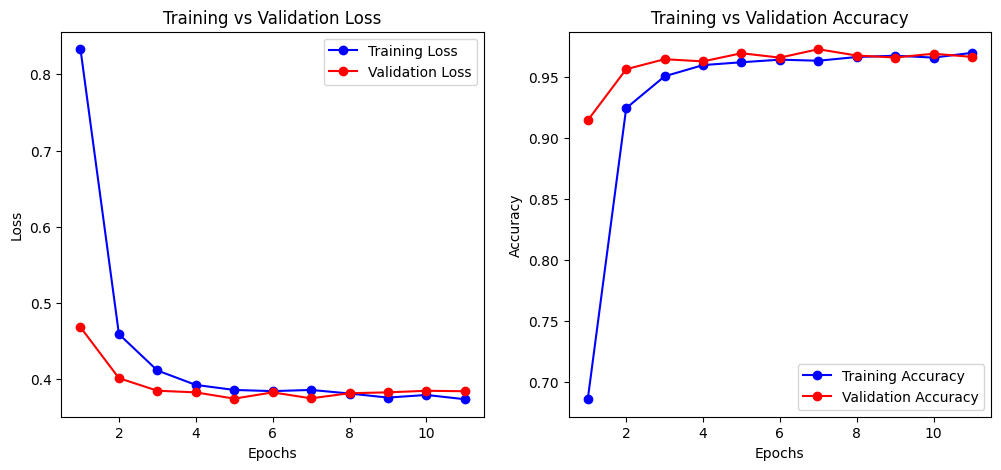

In [67]:
test_loss, test_acc = model.evaluate(xte, yte_encoded)
print(f"Test Accuracy: {test_acc:.4f}")
graph()

In [68]:
model.save('last_model.keras') #dinamakan setelah persentase akurasi

# GUI

In [73]:
dnn = load_model('last_model.keras')
def gui_call():
    baseplate = CTk()
    baseplate.title('FF Sentiment Analysis')
    baseplate.geometry('630x350')
    set_appearance_mode('dark')
    
    label_output = CTkLabel(master=baseplate, text='Output')
    label_output.place(relx=0.37,rely=0.65)
    
    def answer():
        model = combo_model.get()
        input_raw = input_data.get()
        if not input_raw.strip():
            label_output.configure(text='Masukkan input dulu!', text_color='red')
            return
        series_input = pd.Series(input_raw)
        input_preprocess = pd.Series(series_input.apply(preprocess)) # preprocess the data
        input_tf = input_preprocess.apply(_tf) # creates new tf based on the input
        input_tfidf = input_tf.apply(tfidf) # make the tf input to a new tfidf using already existing idf corpus
        input_vectorized = input_tfidf.apply(tfidf_vectorizer) # make it into a vector
        input_ready = np.array([np.array(row) for row in input_vectorized]) # flatten the list of vector
        if model == 'SVM':
            input_pred = svm.predict(input_ready)
        elif model == 'Random Forest':
            input_pred = rf.predict(input_ready)
        else:
            input_pred = np.argmax(dnn.predict(input_ready))+1
            
        print(input_pred)
        output_dict = {1 : 'Kritik', 2 : 'Mixed', 3: 'Pujian'}
        output_text = output_dict.get(input_pred.item(), "Unknown")
        label_output.configure(text=f'Teks tersebut adalah {output_text}', text_color='lightgreen')
            
        
    label_title = CTkLabel(master=baseplate, text='Mesin Pendeteksi Sentimen review uber')
    label_title.place(relx=0.37,rely=0)
    
    label_input = CTkLabel(master=baseplate, text='Masukkan Review anda')
    label_input.place(relx=0.02,rely=0.40)
    
    input_data = CTkEntry(master=baseplate,placeholder_text='Masukkan Review anda', width=250, fg_color='#5e5eff')
    input_data.place(relx=0.25,rely=0.40)
    
    combo_model = CTkComboBox(master=baseplate, values=['SVM', 'Random Forest','DNN'])
    combo_model.place(relx=0.65, rely=0.40)
    
    button = CTkButton(master=baseplate,text='Enter',command=answer,height=35,width=55, fg_color='#5e5eff', hover_color='#6666ff')
    button.place(relx=0.88,rely=0.39)
    
    baseplate.mainloop()

In [74]:
gui_call()

[2.]
